# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


[]

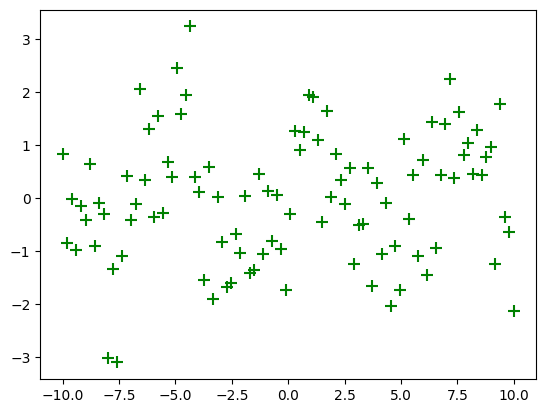

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 100)
Y = np.sin(X)+np.random.randn(len(X))

fig, axes= plt.subplots()
axes.scatter(X, Y, color="green", marker='+', s=69)
axes.plot(markersize=16)



2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


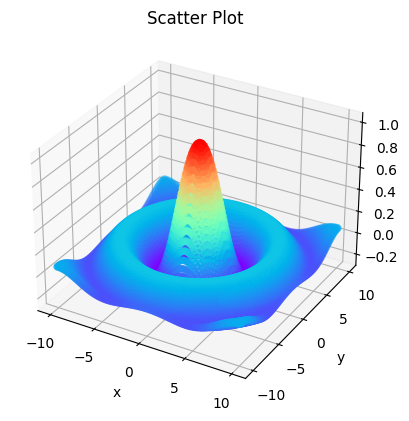

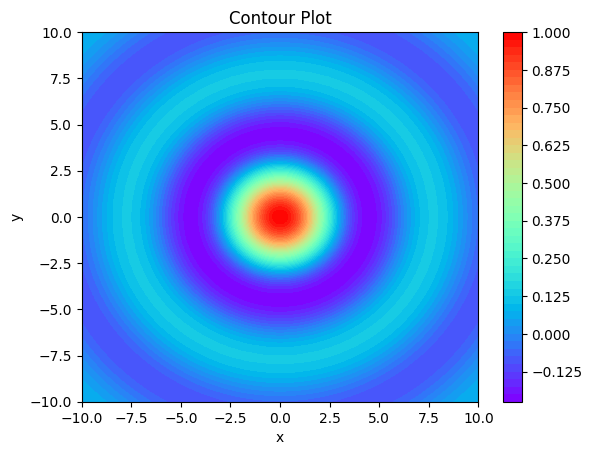

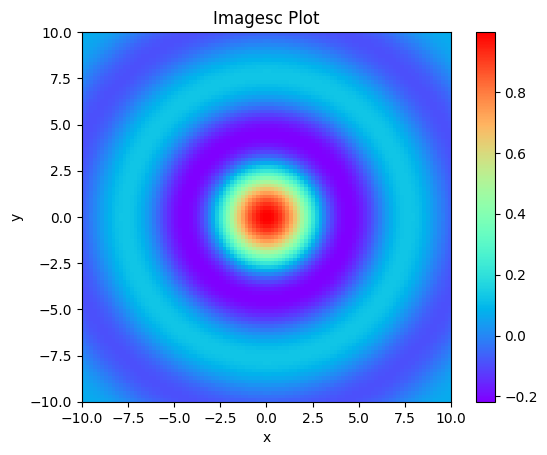

In [121]:
from mpl_toolkits import mplot3d

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))/(np.sqrt(X**2 + Y**2))

fig = plt.figure()
axes = plt.axes(projection="3d")
axes.scatter3D(X, Y, Z, c=Z, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.show()

plt.contourf(X, Y, Z, levels=50, cmap='rainbow')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot')
plt.show()

plt.imshow(Z, extent=[-10, 10, -10, 10], cmap='rainbow')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Imagesc Plot')
plt.show()


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


Text(0.5, 1.0, '2 but in polar coords')

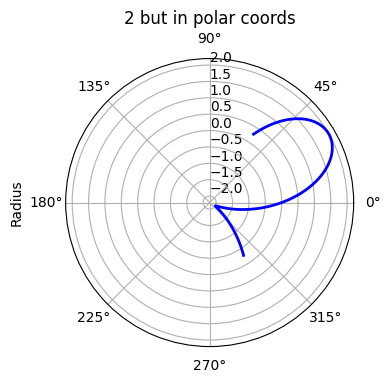

In [73]:
fig = plt.figure()

axes = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
fi = np.linspace(-1, 1, 100)
r = 2*np.sin(3*fi)

axes.plot(fi, r, color='blue', lw=2)
axes.set_rlabel_position(90)
axes.set_ylabel('Radius', labelpad=30)
plt.title('2 but in polar coords')



4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


Text(0.5, 0, 'values')

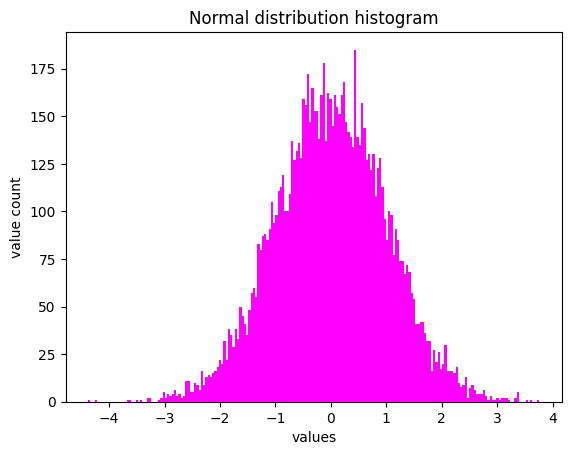

In [89]:
n = np.random.randn(10000)
plt.hist(n, 200, color='#ff00ff')
plt.title('Normal distribution histogram')
plt.ylabel('value count') 
plt.xlabel('values')


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


Text(0.5, 0.92, '3D surface graph')

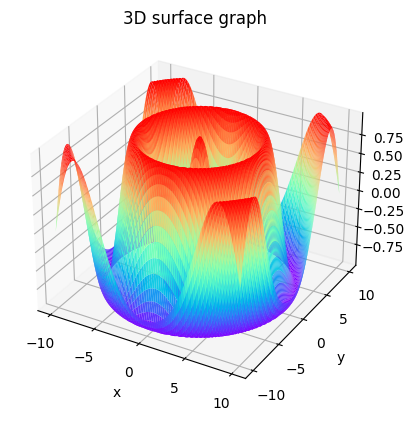

In [111]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.cos(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="rainbow", linewidth=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('3D surface graph')

# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [ ]:
linearni sklon znamena, ze vypocetni narocnost je exponencialni
linear_spiral_numpy je mnohem efektivnejsi

In [5]:
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))
    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1
    i = 1  # číslo, které se bude vkládat do matice
    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů
    return A[1:-1, 1:-1]  # ořízneme nulový okraj

def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2))
    c = n//2+1
    v = 1
    A[c, c] = v
    for i in range(1, c):
        A[c-i,c-i:c+i] = np.arange(v+2*i,v,-1)
        v+=2*i+1
        A[c-i+1:c+i+1,c-i] = np.arange(v,v+2*i)
        v+=2*i
        A[c+i,c-i+1:c+i+1] = np.arange(v,v+2*i)
        v+=2*i-1
        A[c-i:c+i,c+i] = np.arange(v+2*i,v,-1)
        v+=2*i
    return A[1:-1, 1:-1] 

Text(0.5, 1.0, 'integer_spiral_numpy')

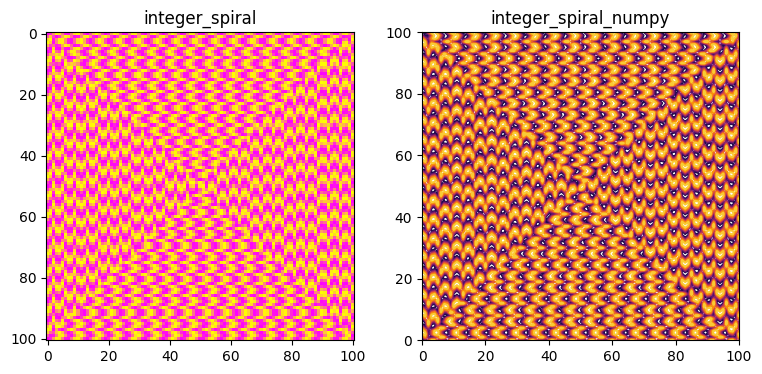

In [6]:
A = integer_spiral(101)
B = integer_spiral_numpy(101)
fig, axes = plt.subplots(1, 2, figsize=(9, 4)) 
axes[0].imshow(np.sin(A), cmap='spring')
axes[0].set_title("integer_spiral")
axes[1].contour(np.sin(B), cmap='inferno')
axes[1].set_title("integer_spiral_numpy")

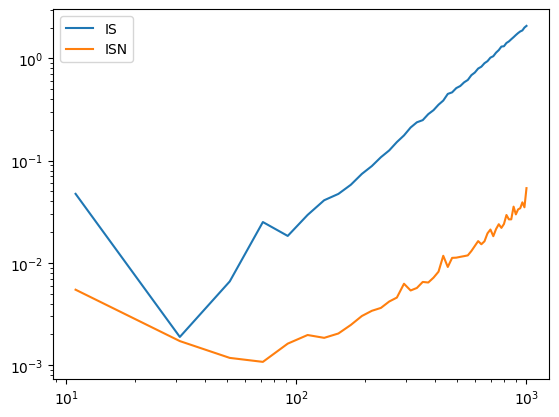

In [27]:
import time
x=np.linspace(11,1002,50)
times_IS = np.zeros(x.size)
times_ISN = np.zeros(x.size)
j=0
for i in range(11,1002,20):
    start=time.time()
    A = integer_spiral(i)
    times_IS[j]=time.time()-start

    start=time.time()
    A = integer_spiral_numpy(i*2)
    times_ISN[j]=time.time()-start
    j+=1
fig, axes = plt.subplots() 
axes.plot(x, times_IS, label='IS')
axes.plot(x, times_ISN, label='ISN')
axes.legend()
axes.set_yscale("log")
axes.set_xscale("log")


# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.